# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from newsapi import NewsApiClient
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\wesleyromero308\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv("Key.env")
api_key = os.getenv("API_Key")
print(api_key)

a9b8702fea7b4a37bf620cfa377beea3


In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [17]:
# Fetch the Bitcoin news articles
bitcoin_articles = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by = "publishedAt",
    page=1
)

# Print total articles
print(f"Total articles: {bitcoin_articles['totalResults']}")

Total articles: 7991


In [18]:
# Fetch the Ethereum news articles
ethereum_articles = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by = "publishedAt",
    page=1
)

# Print total articles
print(f"Total articles: {ethereum_articles['totalResults']}")

Total articles: 3733


In [19]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder Columns
columns = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[columns]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2022-02-03,Reserve Bank may raise reverse repo rate next ...,-0.4767,0.000,0.079,0.921
1,2022-02-03,"Bitcoin failed to test the $40,000 resistance ...",0.1779,0.131,0.086,0.783
2,2022-02-03,A number of crypto miners in Texas are already...,0.1531,0.067,0.000,0.933
3,2022-02-03,Australian billionaire Andrew Twiggy Forrest i...,-0.4588,0.000,0.118,0.882
4,2022-02-03,Key points\r\n<ul><li>Stablecoins are differen...,0.3818,0.141,0.000,0.859


In [20]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder columns
columns = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[columns]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2022-02-03,Reserve Bank may raise reverse repo rate next ...,-0.4767,0.000,0.079,0.921
1,2022-02-03,Building a metaverse certainly is not cheap as...,0.1027,0.111,0.073,0.815
2,2022-02-03,"Online thieves made off with 120,000 wEth, or ...",-0.6808,0.051,0.174,0.775
3,2022-02-03,"Over the past year or so, the mania for NFTs h...",0.4404,0.100,0.000,0.900
4,2022-02-03,This article has been indexed from Cybersecuri...,0.2006,0.087,0.065,0.848


In [21]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.00000,100.000000
mean,0.122856,0.081530,0.05088,0.867610
std,0.487266,0.077882,0.07411,0.093872
min,-0.934900,0.000000,0.00000,0.519000
25%,-0.234350,0.000000,0.00000,0.811000
50%,0.177900,0.067500,0.00000,0.880500
75%,0.458800,0.122500,0.08600,0.933250
max,0.908100,0.350000,0.37200,1.000000


In [22]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.099060,0.073990,0.045800,0.880210
std,0.431339,0.071187,0.062668,0.084356
min,-0.872000,0.000000,0.000000,0.669000
25%,-0.162350,0.000000,0.000000,0.818750
50%,0.089100,0.068500,0.000000,0.892000
75%,0.406800,0.115500,0.085500,0.934250
max,0.868400,0.297000,0.295000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean score of .081. Bitcoin did have twice as many articles.

Q: Which coin had the highest compound score?

A: Bitcoin with  .908

Q. Which coin had the highest positive score?

A: Bitcoin with .350

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [24]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [30]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
#eth articles into a list
import itertools
ethereum_articles = []
for i in ethereum_df['text']:
    ethereum_articles.append(i)

In [37]:
#btc articles into a list
bitcoin_articles = []
for i in bitcoin_df['text']:
    bitcoin_articles.append(i)

In [41]:
# Create a string from the list for bitcoin and eth
eth_str = ' '.join(map(str, ethereum_articles)) 
btc_str = ' '.join(map(str,bitcoin_articles))

In [42]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

In [45]:
# Create a new tokens column for Bitcoin
token_list_bitcoin=[]
for row in range(len(bitcoin_df)):
    token_list_bitcoin.append(tokenizer(bitcoin_df.iloc[row]['text']))
    
bitcoin_df['token'] = token_list_bitcoin
bitcoin_df

,date,text,compound,positive,negative,neutral,token
0,2022-02-03,Reserve Bank may raise reverse repo rate next ...,-0.4767,0.000,0.079,0.921,"[reserve, bank, may, raise, reverse, repo, rat..."
1,2022-02-03,"Bitcoin failed to test the $40,000 resistance ...",0.1779,0.131,0.086,0.783,"[bitcoin, failed, test, resistance, zone, us, ..."
2,2022-02-03,A number of crypto miners in Texas are already...,0.1531,0.067,0.000,0.933,"[number, crypto, miner, texas, already, shutti..."
3,2022-02-03,Australian billionaire Andrew Twiggy Forrest i...,-0.4588,0.000,0.118,0.882,"[australian, billionaire, andrew, twiggy, forr..."
4,2022-02-03,Key points\r\n<ul><li>Stablecoins are differen...,0.3818,0.141,0.000,0.859,"[key, pointsullistablecoins, different, crypto..."
...,...,...,...,...,...,...,...
95,2022-02-02,A police constable accused of kidnapping a loc...,-0.6486,0.057,0.218,0.725,"[police, constable, accused, kidnapping, local..."
96,2022-02-02,"Even in death, the John McAfee saga grows stra...",-0.8957,0.000,0.258,0.742,"[even, death, john, mcafee, saga, grows, stran..."
97,2022-02-02,Twitter founder Jack Dorsey has said Meta (for...,-0.7430,0.000,0.174,0.826,"[twitter, founder, jack, dorsey, ha, said, met..."
98,2022-02-02,MicroStrategy has acquired a further $25 milli...,0.2263,0.060,0.000,0.940,"[microstrategy, ha, acquired, million, worth, ..."


In [47]:
# Create a new tokens column for Ethereum
token_list_ethereum=[]
for row in range(len(ethereum_df)):
    token_list_ethereum.append(tokenizer(ethereum_df.iloc[row]['text']))
    
ethereum_df['token'] = token_list_ethereum
ethereum_df

,date,text,compound,positive,negative,neutral,token
0,2022-02-03,Reserve Bank may raise reverse repo rate next ...,-0.4767,0.000,0.079,0.921,"[reserve, bank, may, raise, reverse, repo, rat..."
1,2022-02-03,Building a metaverse certainly is not cheap as...,0.1027,0.111,0.073,0.815,"[building, metaverse, certainly, cheap, financ..."
2,2022-02-03,"Online thieves made off with 120,000 wEth, or ...",-0.6808,0.051,0.174,0.775,"[online, thief, made, weth, wrapped, ethereum,..."
3,2022-02-03,"Over the past year or so, the mania for NFTs h...",0.4404,0.100,0.000,0.900,"[past, year, mania, nfts, ha, reached, fevered..."
4,2022-02-03,This article has been indexed from Cybersecuri...,0.2006,0.087,0.065,0.848,"[article, ha, indexed, cybersecuritywormhole, ..."
...,...,...,...,...,...,...,...
95,2022-02-02,"Bitcoin, Ethereum or non-fungible tokens (NFT)...",-0.0695,0.033,0.041,0.926,"[bitcoin, ethereum, nonfungible, token, nft, n..."
96,2022-02-02,Finance Secretary TV Somanathan on Wednesday s...,0.2801,0.078,0.043,0.879,"[finance, secretary, tv, somanathan, wednesday..."
97,2022-02-02,Roman Sibiryakov/Shutterstock.com\r\nDazzling ...,0.4497,0.082,0.000,0.918,"[roman, sibiryakovshutterstockcomdazzling, sal..."
98,2022-02-02,AMD is on a real tear at the moment—and has be...,0.7650,0.178,0.000,0.822,"[amd, real, tear, momentand, ha, last, couple,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [49]:
from collections import Counter
from nltk import ngrams

In [50]:
# Generate the Bitcoin N-grams where N=2
n=2
for row in range(len(bitcoin_df)):
    sentence = bitcoin_df.iloc[row]['text']
    bigram = ngrams(sentence.split(), n)    

    for grams in bigram:
        print(grams)

('Reserve', 'Bank')
('Bank', 'may')
('may', 'raise')
('raise', 'reverse')
('reverse', 'repo')
('repo', 'rate')
('rate', 'next')
('next', 'week')
('week', 'The')
('The', 'central')
('central', 'governments')
('governments', 'plan')
('plan', 'of')
('of', 'gross')
('gross', 'borrowing')
('borrowing', 'of')
('of', 'Rs')
('Rs', '14.1')
('14.1', 'trillion')
('trillion', 'and')
('and', 'net')
('net', 'borrowing')
('borrowing', 'of')
('of', 'Rs')
('Rs', '11.6')
('11.6', 'trillion')
('trillion', 'in')
('in', 'financial')
('financial', 'tear')
('tear', '2022-23')
('2022-23', 'is')
('is', 'likely')
('likely', 'to')
('to', 'p…')
('p…', '[+6961')
('[+6961', 'chars]')
('Bitcoin', 'failed')
('failed', 'to')
('to', 'test')
('test', 'the')
('the', '$40,000')
('$40,000', 'resistance')
('resistance', 'zone')
('zone', 'against')
('against', 'the')
('the', 'US')
('US', 'Dollar.')
('Dollar.', 'BTC')
('BTC', 'is')
('is', 'now')
('now', 'declining')
('declining', 'and')
('and', 'might')
('might', 'slide')
('s

In [51]:
# Generate the Ethereum N-grams where N=2
n=2
for row in range(len(ethereum_df)):
    sentence = ethereum_df.iloc[row]['text']
    bigram = ngrams(sentence.split(), n)    

    for grams in bigram:
        print(grams)

('Reserve', 'Bank')
('Bank', 'may')
('may', 'raise')
('raise', 'reverse')
('reverse', 'repo')
('repo', 'rate')
('rate', 'next')
('next', 'week')
('week', 'The')
('The', 'central')
('central', 'governments')
('governments', 'plan')
('plan', 'of')
('of', 'gross')
('gross', 'borrowing')
('borrowing', 'of')
('of', 'Rs')
('Rs', '14.1')
('14.1', 'trillion')
('trillion', 'and')
('and', 'net')
('net', 'borrowing')
('borrowing', 'of')
('of', 'Rs')
('Rs', '11.6')
('11.6', 'trillion')
('trillion', 'in')
('in', 'financial')
('financial', 'tear')
('tear', '2022-23')
('2022-23', 'is')
('is', 'likely')
('likely', 'to')
('to', 'p…')
('p…', '[+6961')
('[+6961', 'chars]')
('Building', 'a')
('a', 'metaverse')
('metaverse', 'certainly')
('certainly', 'is')
('is', 'not')
('not', 'cheap')
('cheap', 'as')
('as', 'financial')
('financial', 'records')
('records', 'of')
('of', "Meta's")
("Meta's", 'Reality')
('Reality', 'Labs')
('Labs', 'show.')
('show.', 'Its')
('Its', 'Q4')
('Q4', '2021')
('2021', 'earnings,'

In [53]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [65]:
# Use token_count to get the top 10 words for Bitcoin
all_tokens_bc = []
for row in range(len(bitcoin_df)):
    all_tokens_bc += bitcoin_df.iloc[row]['token']
top_btc=token_count(all_tokens_bc,10)
top_btc

[('char', 100),
 ('bitcoin', 35),
 ('crypto', 21),
 ('cryptocurrency', 18),
 ('ha', 17),
 ('wednesday', 16),
 ('wa', 12),
 ('market', 11),
 ('company', 11),
 ('year', 10)]

In [64]:
# Use token_count to get the top 10 words for Ethereum
all_tokens_eth = []
for row in range(len(ethereum_df)):
    all_tokens_eth += ethereum_df.iloc[row]['token']
top_eth=token_count(all_tokens_eth,10)
top_eth

[('char', 100),
 ('ethereum', 22),
 ('crypto', 22),
 ('ha', 21),
 ('digital', 20),
 ('bitcoin', 19),
 ('token', 17),
 ('nft', 17),
 ('cryptocurrency', 15),
 ('nfts', 15)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [67]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

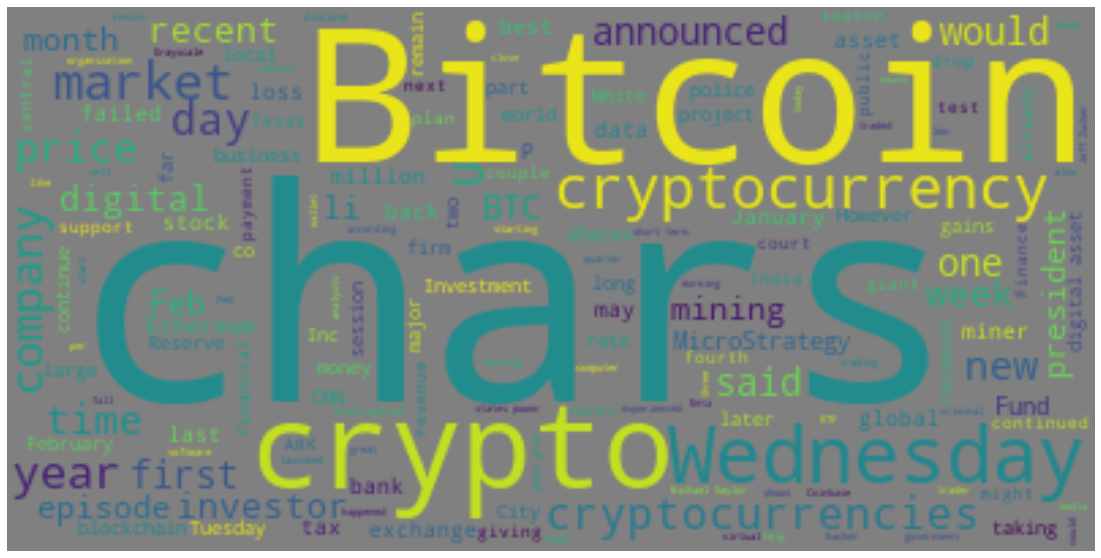

In [74]:
# Generate the Bitcoin word cloud
text = " ".join(review for review in bitcoin_df.text)
wordcloud = WordCloud(stopwords=stop_words, background_color="grey").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

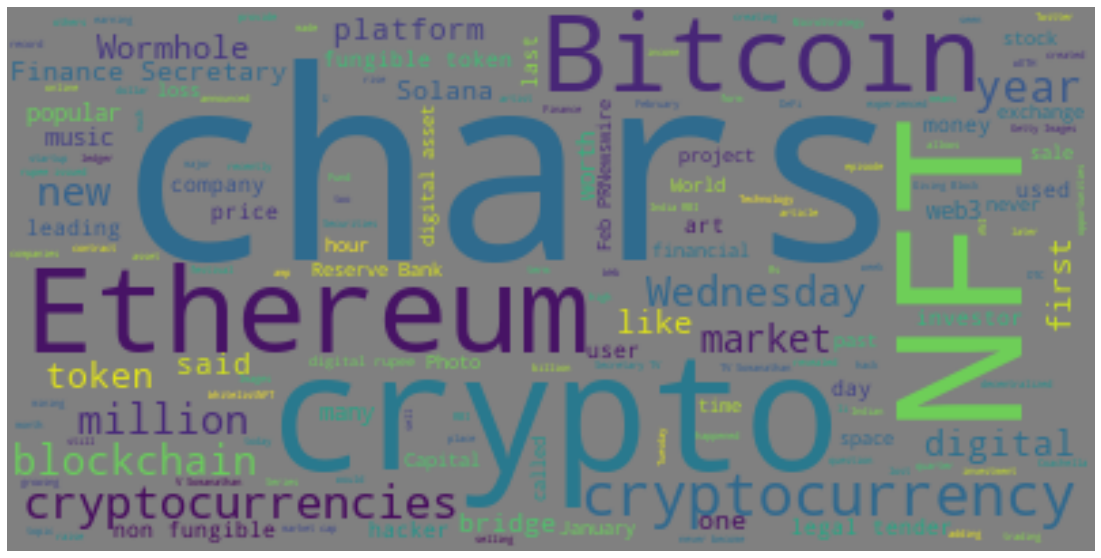

In [72]:
# Generate the Ethereum word cloud
text = " ".join(review for review in ethereum_df.text)
wordcloud = WordCloud(stopwords=stop_words, background_color="grey").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [75]:
import spacy
from spacy import displacy

In [78]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [79]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [80]:
# Concatenate all of the Bitcoin text together
text = " ".join(review for review in bitcoin_df.text)

In [84]:
# Run the NER processor on all of the text
from spacy import displacy

doc2 = nlp(text)
nlp = spacy.load("en_core_web_sm")

In [82]:
# Render the visualization
displacy.render(doc, style='ent')

In [85]:
# List all Entities
print([ent.text for ent in doc.ents])

['Reserve Bank', 'next week', 'Rs 14.1 trillion', '11.6 trillion', '2022-23', '40,000', 'US', '36,000', 'Texas', 'Arctic', 'this week', 'Australian', 'Andrew Twiggy Forrest', 'Thursday', 'IRS', '3,293', 'Nashville', '8,876', 'Tezos', 'Two years', 'four', 'South Park', 'Comedy Central', 'Wednesday', '25th season', 'one', 'Pajama', 'one', 'Wednesday', 'nearly 25%', 'IRS', 'Nashville', 'Wednesday', 'ARK', 'earlier in the week', '1.1%', 'Wednesday', 'ARK', 'earlier in the week', 'Late last year', 'El Salvador’s', 'Nayib Bukele', 'Bitcoin City', 'India', 'T.V. Somanathan', 'Wednesday', 'the Reserve Bank of', 'India', 'Thailand', '15%', 'Ethereum Classic', 'the 17th January', 'ETC', 'the last 24 hours', 'ETC', '7%', 'Ho', 'Christmas', 'January', 'around 50%', 'almost $70,000', 'years', 'Indian', 'Tuesday', 'A day later', '104,000', 'Sydney', 'seven years later', 'more than $100,000', 'Yuri Nomura', '2022.02.03', 'Adams', 'New York City', 'Crypto', 'Riot Blockchain Inc.', 'Texas', '+517', 'Tr

---

### Ethereum NER

In [87]:
# Concatenate all of the Ethereum text together
text = " ".join(review for review in ethereum_df.text)

In [32]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [33]:
# Render the visualization
# YOUR CODE HERE!

In [34]:
# List all Entities
# YOUR CODE HERE!

---